In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
df_train = pd.read_csv('C:\\Users\\DELL\\Downloads\\Diabetes\\Taxi Fare Price Prediction\\train.csv', parse_dates =['pickup_datetime'], nrows=500000)

In [3]:
df_test = pd.read_csv('C:\\Users\\DELL\\Downloads\\Diabetes\\Taxi Fare Price Prediction\\test.csv', parse_dates =['pickup_datetime'], nrows=500000)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                500000 non-null  object             
 1   fare_amount        500000 non-null  float64            
 2   pickup_datetime    500000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   500000 non-null  float64            
 4   pickup_latitude    500000 non-null  float64            
 5   dropoff_longitude  499995 non-null  float64            
 6   dropoff_latitude   499995 non-null  float64            
 7   passenger_count    500000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 30.5+ MB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float64            
 3   pickup_latitude    9914 non-null   float64            
 4   dropoff_longitude  9914 non-null   float64            
 5   dropoff_latitude   9914 non-null   float64            
 6   passenger_count    9914 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 542.3+ KB


In [6]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

df2 = df_train.copy(deep=True)
for long in ['pickup_longitude', 'dropoff_longitude']:
    df2 = df2[(df2[long] > nyc_min_longitude) & (df2[long] <
                                                 nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
    df2 = df2[(df2[lat] > nyc_min_latitude) & (df2[lat] < 
                                               nyc_max_latitude)]

In [7]:
landmarks = {'JFK Airport': (-73.78, 40.643),
             'Laguardia Airport': (-73.87, 40.77),
             'Midtown': (-73.98, 40.76),
             'Lower Manhattan': (-74.00, 40.72),
             'Upper Manhattan': (-73.94, 40.82),
             'Brooklyn': (-73.95, 40.66)}

In [8]:
from matplotlib import pyplot as plt 
def plot_lat_long(df,landmarks,points='Pickup'):
    plt.figure(figsize=(12,12)) #set figure size
    if points == 'Pickup':
        plt.plot(list(df.pickup_longitude), list(df.pickup_latitude), 
                 '.', markersize=1)
    else:
        plt.plot(list(df.dropoff_longitude), list(df.dropoff_latitude), 
                 '.', markersize=1)

    for landmark in landmarks:
        plt.plot(landmarks[landmark][0], landmarks[landmark][1], 
                '*', markersize=15, alpha=1, color='r') 
        plt.annotate(landmark, (landmarks[landmark][0]+0.005, 
                     landmarks[landmark][1]+0.005), color='r', 
                     backgroundcolor='w') 
 
    plt.title("{} Locations in NYC Illustrated".format(points))
    plt.grid(None)
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.show()

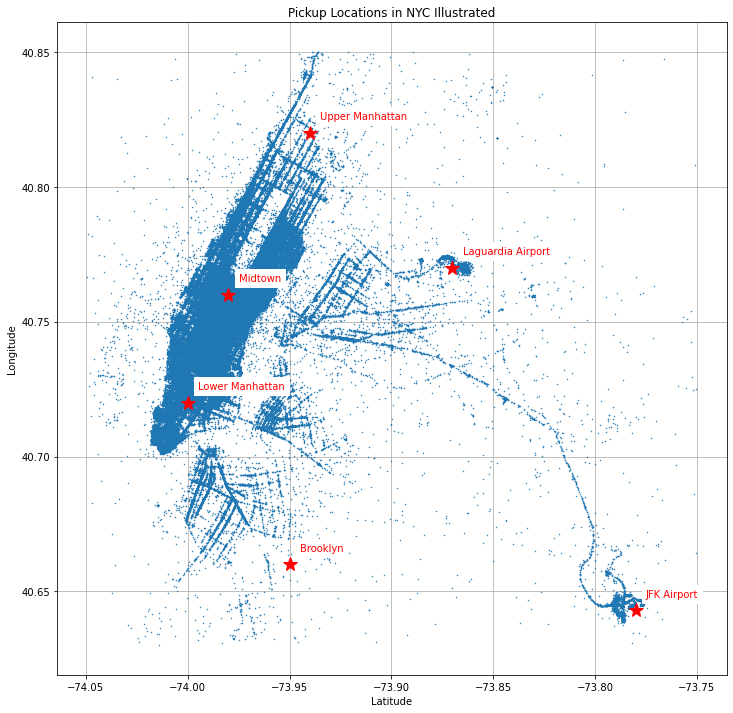

In [9]:
plot_lat_long(df2, landmarks, points='Pickup')

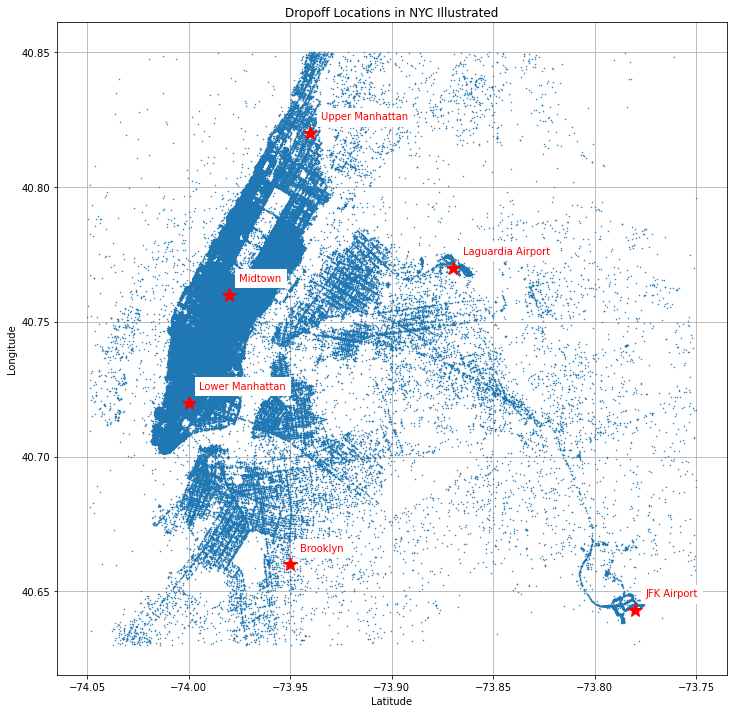

In [10]:
plot_lat_long(df2, landmarks, points='Dropoff')

In [11]:
df_train['year'] = df_train['pickup_datetime'].dt.year
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['day'] = df_train['pickup_datetime'].dt.day
df_train['dayofweek'] = df_train['pickup_datetime'].dt.dayofweek
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayofweek,hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


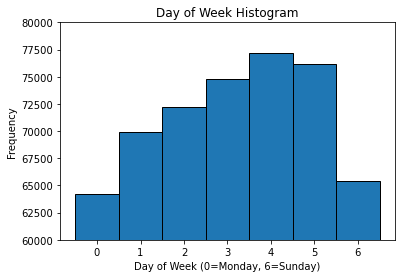

In [12]:
df_train['dayofweek'].plot.hist(bins=np.arange(8)-0.5,ec='black',ylim=(60000,80000))
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.title('Day of Week Histogram')
plt.show()

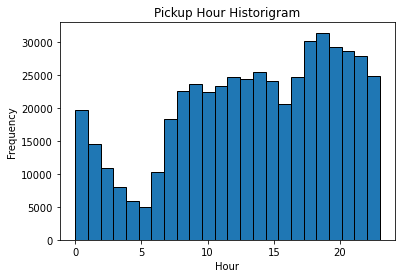

In [13]:
df_train['hour'].plot.hist(bins=24, ec='black')
plt.title('Pickup Hour Historigram')
plt.xlabel('Hour')
plt.show()

In [14]:
df_train.isnull().any()

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude     True
dropoff_latitude      True
passenger_count      False
year                 False
month                False
day                  False
dayofweek            False
hour                 False
dtype: bool

In [15]:
df_train = df_train.dropna()

In [16]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayofweek,hour
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-72.520091,39.920350,-72.522435,39.916526,1.683445,2011.739129,6.268617,15.684239,3.042020,13.510843
std,9.916069,11.856446,8.073318,11.797362,7.391002,1.307391,1.860897,3.437798,8.681092,1.949243,6.511596
min,-44.900000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992047,40.734916,-73.991382,40.734057,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981785,40.752670,-73.980126,40.753152,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967117,40.767076,-73.963572,40.768135,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


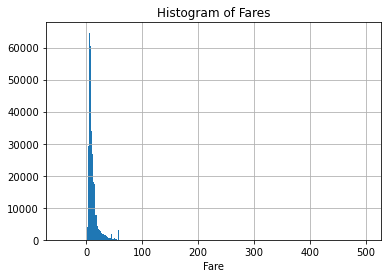

In [17]:
df_train['fare_amount'].hist(bins=500)
plt.xlabel('Fare')
plt.title('Histogram of Fares')
plt.show()

In [18]:
df_train = df_train[(df_train['fare_amount'] >=0) & (df_train['fare_amount'] <= 100)]

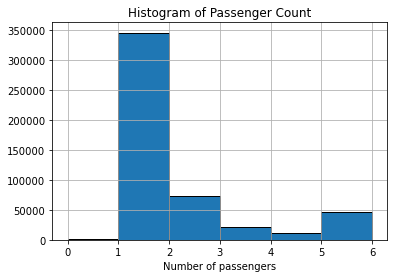

In [19]:
df_train['passenger_count'].hist(bins=6,ec='black')
plt.xlabel("Number of passengers")
plt.title("Histogram of Passenger Count")
plt.show()

In [20]:
df_train['passenger_count'] = df_train['passenger_count'].replace(0,1)

In [21]:
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayofweek,hour
count,499760.000000,499760.000000,499760.000000,499760.000000,499760.000000,499760.000000,499760.000000,499760.000000,499760.000000,499760.000000,499760.000000
mean,11.300049,-72.522405,39.921591,-72.525784,39.918307,1.687164,2011.738677,6.268683,15.684080,3.042068,13.510963
std,9.400215,11.850322,8.071247,11.788054,7.386892,1.304277,1.860821,3.437844,8.681169,1.949242,6.511278
min,0.000000,-2986.242495,-3116.285383,-3383.296608,-2559.748913,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.992049,40.734926,-73.991380,40.734062,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000
50%,8.500000,-73.981788,40.752674,-73.980128,40.753152,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000
75%,12.500000,-73.967133,40.767072,-73.963587,40.768125,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000
max,100.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000


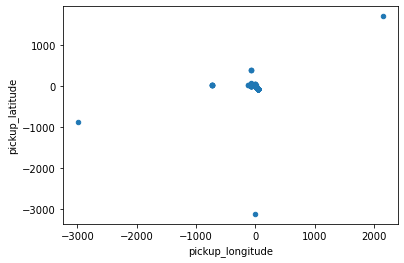

In [22]:
df_train.plot.scatter('pickup_longitude','pickup_latitude')
plt.show()

In [23]:
# range of longitude for NYC
nyc_min_longitude = -74.05
nyc_max_longitude = -73.75

# range of latitude for NYC
nyc_min_latitude = 40.63
nyc_max_latitude = 40.85

# only consider locations within NYC
for long in ['pickup_longitude', 'dropoff_longitude']:
    df_train = df_train[(df_train[long] > nyc_min_longitude) & (df_train[long] <
                                              nyc_max_longitude)]

for lat in ['pickup_latitude', 'dropoff_latitude']:
    df_train = df_train[(df_train[lat] > nyc_min_latitude) & (df_train[lat] < 
                                            nyc_max_latitude)]

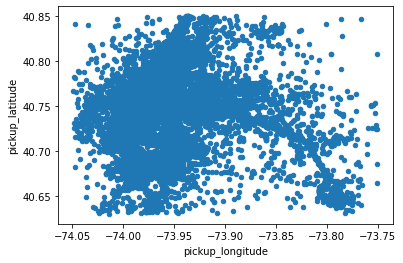

In [24]:
df_train.plot.scatter('pickup_longitude','pickup_latitude')
plt.show()

In [25]:
#Preprocessing code for cleaning and preparing datasets
def preprocess(df): 
    # remove missing values in the dataframe
    def remove_missing_values(df):
        df = df.dropna()
        return df

    # remove outliers in fare amount
    def remove_fare_amount_outliers(df, lower_bound, upper_bound):
        df = df[(df['fare_amount'] >= lower_bound) & 
                (df['fare_amount'] <= upper_bound)]
        return df

    # replace outliers in passenger count with the mode
    def replace_passenger_count_outliers(df):
        mode = df['passenger_count'].mode()
        df.loc[df['passenger_count'] == 0, 'passenger_count'] = mode
        return df

    # remove outliers in latitude and longitude
    def remove_lat_long_outliers(df):
        # range of longitude for NYC
        nyc_min_longitude = -74.05
        nyc_max_longitude = -73.75
        # range of latitude for NYC
        nyc_min_latitude = 40.63
        nyc_max_latitude = 40.85
        # only consider locations within New York City
        for long in ['pickup_longitude', 'dropoff_longitude']:
            df = df[(df[long] > nyc_min_longitude) & 
                    (df[long] < nyc_max_longitude)]
        for lat in ['pickup_latitude', 'dropoff_latitude']:
            df = df[(df[lat] > nyc_min_latitude) & 
                    (df[lat] < nyc_max_latitude)]
        return df

    df = remove_missing_values(df)
    df = remove_fare_amount_outliers(df, lower_bound = 0, 
                                     upper_bound = 100)
    df = replace_passenger_count_outliers(df)
    df = remove_lat_long_outliers(df)
    return df

In [26]:
df_train = df_train.drop(['pickup_datetime'], axis = 1)

In [27]:
#Geolocation features by getting the straight-line distance between two points
def euc_distance(lat1,long1,lat2,long2):
    return (((lat1-lat2)**2+(long1-long2)**2)**0.5)

In [28]:
df_train['distance'] = euc_distance(df_train['pickup_latitude'],df_train['pickup_longitude'],df_train['dropoff_latitude'],df_train['dropoff_longitude'])

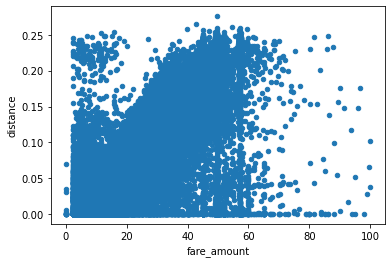

In [29]:
df_train.plot.scatter('fare_amount','distance')
plt.show()

In [30]:
df_train.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayofweek,hour,distance
fare_amount,1.000000,0.449523,-0.226575,0.399755,-0.195585,0.016378,0.123776,0.027200,0.002103,0.003100,-0.015563,0.883670
pickup_longitude,0.449523,1.000000,-0.025616,0.290005,0.053013,0.003216,0.013379,0.005540,0.000917,-0.023567,0.016874,0.473016
pickup_latitude,-0.226575,-0.025616,1.000000,0.059753,0.424755,-0.006858,-0.012811,-0.007081,-0.001827,-0.041915,0.030571,-0.247923
dropoff_longitude,0.399755,0.290005,0.059753,1.000000,0.097029,-0.000309,0.007797,0.005282,0.002909,-0.000095,-0.053186,0.442256
dropoff_latitude,-0.195585,0.053013,0.424755,0.097029,1.000000,-0.003474,-0.006232,-0.005983,-0.001342,-0.033471,0.021065,-0.180204
passenger_count,0.016378,0.003216,-0.006858,-0.000309,-0.003474,1.000000,0.005821,0.004604,0.005390,0.037472,0.016112,0.012618
year,0.123776,0.013379,-0.012811,0.007797,-0.006232,0.005821,1.000000,-0.117335,-0.009969,0.010533,0.002830,0.026978
month,0.027200,0.005540,-0.007081,0.005282,-0.005983,0.004604,-0.117335,1.000000,-0.016355,-0.009172,-0.003291,0.014505
day,0.002103,0.000917,-0.001827,0.002909,-0.001342,0.005390,-0.009969,-0.016355,1.000000,0.006815,0.002391,0.002243
dayofweek,0.003100,-0.023567,-0.041915,-0.000095,-0.033471,0.037472,0.010533,-0.009172,0.006815,1.000000,-0.087239,0.013268


In [31]:
airports = {'JFK_Airport': (-73.78,40.643),
            'Laguardia_Airport': (-73.87, 40.77),
            'Newark_Airport' : (-74.18, 40.69)}

for airport in airports:
    df_train['pickup_dist_' + airport] = euc_distance(df_train['pickup_latitude'],
                                                df_train['pickup_longitude'], 
                                                airports[airport][1], 
                                                airports[airport][0])
    df_train['dropoff_dist_' + airport] = euc_distance(df_train['dropoff_latitude'], 
                                                 df_train['dropoff_longitude'],
                                                 airports[airport][1], 
                                                 airports[airport][0])
    

In [32]:
df_train[['key', 'pickup_longitude', 'pickup_latitude', 
          'dropoff_longitude', 'dropoff_latitude', 
          'pickup_dist_JFK_Airport',
          'dropoff_dist_JFK_Airport']].head()

,key,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport
0,2009-06-15 17:26:21.0000001,-73.844311,40.721319,-73.841610,40.712278,0.101340,0.092710
1,2010-01-05 16:52:16.0000002,-74.016048,40.711303,-73.979268,40.782004,0.245731,0.242961
2,2011-08-18 00:35:00.00000049,-73.982738,40.761270,-73.991242,40.750562,0.234714,0.237050
3,2012-04-21 04:30:42.0000001,-73.987130,40.733143,-73.991567,40.758092,0.225895,0.240846
4,2010-03-09 07:51:00.000000135,-73.968095,40.768008,-73.956655,40.783762,0.225847,0.225878


In [33]:
df_train = df_train.drop(['key'],axis = 1)

In [34]:
#Feature engineering function
def feature_engineer(df):
    # create new columns for year, month, day, day of week and hour
    def create_time_features(df):
        df['year'] = df['pickup_datetime'].dt.year
        df['month'] = df['pickup_datetime'].dt.month
        df['day'] = df['pickup_datetime'].dt.day
        df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
        df['hour'] = df['pickup_datetime'].dt.hour
        df = df.drop(['pickup_datetime'], axis=1)
        return df

    # function to calculate euclidean distance
    def euc_distance(lat1, long1, lat2, long2):
        return(((lat1-lat2)**2 + (long1-long2)**2)**0.5)

    # create new column for the distance travelled
    def create_pickup_dropoff_dist_features(df):
        df['travel_distance'] = euc_distance(df['pickup_latitude'], 
                                             df['pickup_longitude'], 
                                             df['dropoff_latitude'],
                                             df['dropoff_longitude'])
        return df

    # create new column for the distance away from airports
    def create_airport_dist_features(df):
        airports = {'JFK_Airport': (-73.78,40.643),
                    'Laguardia_Airport': (-73.87, 40.77),
                    'Newark_Airport' : (-74.18, 40.69)}
        for k in airports:
            df['pickup_dist_'+k]=euc_distance(df['pickup_latitude'], 
                                              df['pickup_longitude'],
                                              airports[k][1],
                                              airports[k][0])
            df['dropoff_dist_'+k]=euc_distance(df['dropoff_latitude'], 
                                               df['dropoff_longitude'],
                                               airports[k][1],
                                               airports[k][0]) 
        return df

    df = create_time_features(df)
    df = create_pickup_dropoff_dist_features(df)
    df = create_airport_dist_features(df)
    df = df.drop(['key'], axis=1)
    return df

In [35]:
#Feature Scaling
df_prescaled = df_train.copy()
df_scaled = df_train.drop(['fare_amount'],axis =1)
from sklearn.preprocessing import scale
df_scaled = scale(df_scaled)

cols = df_train.columns.tolist()
cols.remove('fare_amount')
df_scaled = pd.DataFrame(df_scaled, columns=cols, index=df_train.index)
df_scaled = pd.concat([df_scaled, df_train['fare_amount']], axis=1)
df_train = df_scaled.copy()

In [36]:
df_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,dayofweek,hour,distance,pickup_dist_JFK_Airport,dropoff_dist_JFK_Airport,pickup_dist_Laguardia_Airport,dropoff_dist_Laguardia_Airport,pickup_dist_Newark_Airport,dropoff_dist_Newark_Airport,fare_amount
0,3.916896,-1.128227,4.151116,-1.365537,-0.526888,-1.469611,-0.078187,-0.078219,-1.560801,0.535442,-0.646405,-3.957854,-4.628070,-2.321151,-1.901119,3.494461,3.621417,4.5
1,-1.203464,-1.510227,-0.146055,1.083475,-0.526888,-0.932852,-1.531625,-1.230176,-1.047515,0.381408,1.292368,0.651855,0.631996,1.791541,-0.076296,-1.403329,0.144374,16.9
2,-0.210322,0.395464,-0.519838,-0.020874,0.239932,-0.396092,0.503188,0.267369,-0.020945,-2.083145,-0.529455,0.300110,0.425078,0.010540,0.438538,-0.137330,-0.519138,5.7
3,-0.341270,-0.677271,-0.529984,0.243605,-0.526888,0.140667,-0.659562,0.612956,1.005625,-1.467007,-0.207528,0.018578,0.557964,0.400941,0.412867,-0.482410,-0.456748,7.7
4,0.226261,0.652445,0.559839,1.145221,-0.526888,-0.932852,-0.950250,-0.769393,-1.047515,-1.004903,-0.369533,0.017033,0.033960,-0.590553,-0.964083,0.320629,0.773758,5.3


In [37]:
#Split train and test set
X = df_train.drop(['fare_amount'], axis = 1)
y= df_train['fare_amount']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.2)

In [38]:
#Model building
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128,activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(1))

Using TensorFlow backend.


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2304      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 12,913
Trainable params: 12,913
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='mse',optimizer='adam',metrics=['mse'])
model.fit(X_train,y_train, epochs=1)

Epoch 1/1
386750/386750 [==============================] - 27s 69us/step - loss: 13.6649 - mse: 13.6649


In [41]:
from sklearn.metrics import mean_squared_error

train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

print("Train RMSE: {:0.2f}".format(train_rmse))
print("Test RMSE: {:0.2f}".format(test_rmse))

Train RMSE: 3.46
Test RMSE: 3.57


In [42]:
def predict_random(df_prescaled, X_test, model):
    sample = X_test.sample(n=1, random_state=np.random.randint(low=0, 
                                                              high=10000))
    idx = sample.index[0]

    actual_fare = df_prescaled.loc[idx,'fare_amount']
    day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday',
                 'Saturday', 'Sunday']
    day_of_week = day_names[df_prescaled.loc[idx,'dayofweek']]
    hour = df_prescaled.loc[idx,'hour']
    predicted_fare = model.predict(sample)[0][0]
    rmse = np.sqrt(np.square(predicted_fare-actual_fare))

    print("Trip Details: {}, {}:00hrs".format(day_of_week, hour)) 
    print("Actual fare: ${:0.2f}".format(actual_fare))
    print("Predicted fare: ${:0.2f}".format(predicted_fare))
    print("RMSE: ${:0.2f}".format(rmse))

predict_random(df_prescaled, X_test, model)

Trip Details: Saturday, 10:00hrs
Actual fare: $6.50
Predicted fare: $5.37
RMSE: $1.13
